In [46]:
import pandas as pd
from fbprophet import Prophet
from datetime import datetime
import csv
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.rcParams["figure.figsize"] = (20,10)
import numpy as np

In [47]:
df = pd.read_csv('myit.csv', index_col='DATE', parse_dates=True) # historical average temperature of Myitkyina,
# Myanmar downloaded from NOAA
# displaying with DATE column as index column
df.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,PRCP,PRCP_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES
DATE,,,,,,,,,,,,,
2010-01-01,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,69,"H,,S",NaN,NaN,50.0,",,S"
2010-01-02,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,67,"H,,S",NaN,NaN,NaN,NaN
2010-01-03,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,60,"H,,S",81.0,",,S",46.0,",,S"
2010-01-04,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,62,"H,,S",81.0,",,S",45.0,",,S"
2010-01-06,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,65,"H,,S",NaN,NaN,49.0,",,S"


In [48]:
datatest=df.reset_index() #resetting to original index column

In [49]:
datatest.head()

,DATE,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,PRCP,PRCP_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES
0,2010-01-01,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,69,"H,,S",NaN,NaN,50.0,",,S"
1,2010-01-02,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,67,"H,,S",NaN,NaN,NaN,NaN
2,2010-01-03,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,60,"H,,S",81.0,",,S",46.0,",,S"
3,2010-01-04,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,62,"H,,S",81.0,",,S",45.0,",,S"
4,2010-01-06,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,65,"H,,S",NaN,NaN,49.0,",,S"


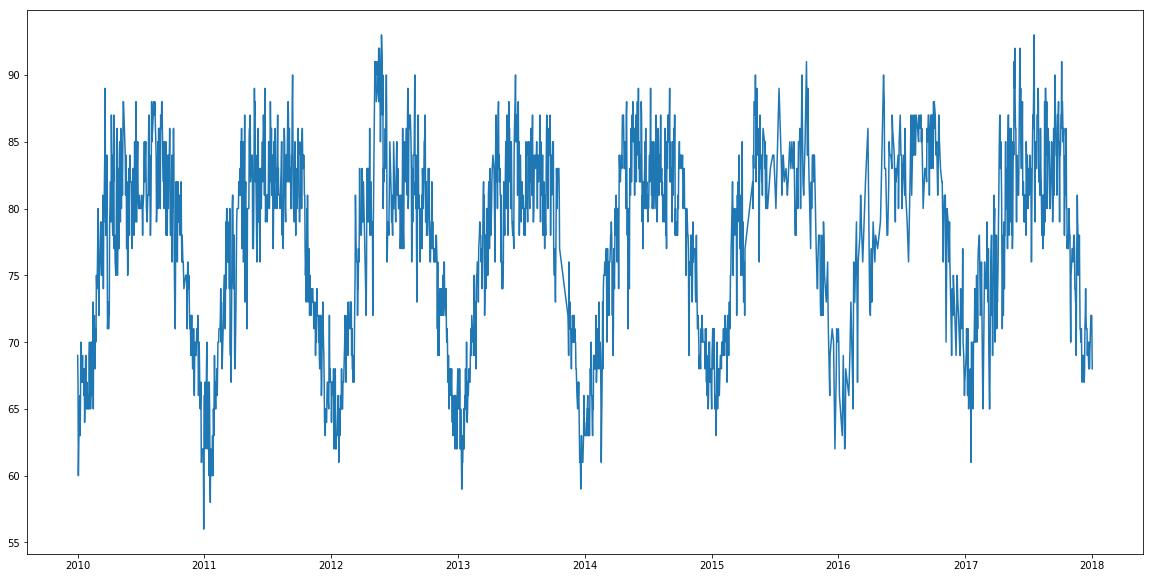

In [50]:
plt.plot(datatest['DATE'], datatest['TAVG']) #Plotting date and daily average temperature
plt.show()

In [51]:
datatest=datatest.rename(columns={'DATE':'ds', 'TAVG':'y'})
#renaming the column for prophet, columns need to be ds and y for DATE and TAVG, temperature average

In [52]:
datatest.head()

,ds,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,PRCP,PRCP_ATTRIBUTES,y,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES
0,2010-01-01,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,69,"H,,S",NaN,NaN,50.0,",,S"
1,2010-01-02,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,67,"H,,S",NaN,NaN,NaN,NaN
2,2010-01-03,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,60,"H,,S",81.0,",,S",46.0,",,S"
3,2010-01-04,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,62,"H,,S",81.0,",,S",45.0,",,S"
4,2010-01-06,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,65,"H,,S",NaN,NaN,49.0,",,S"


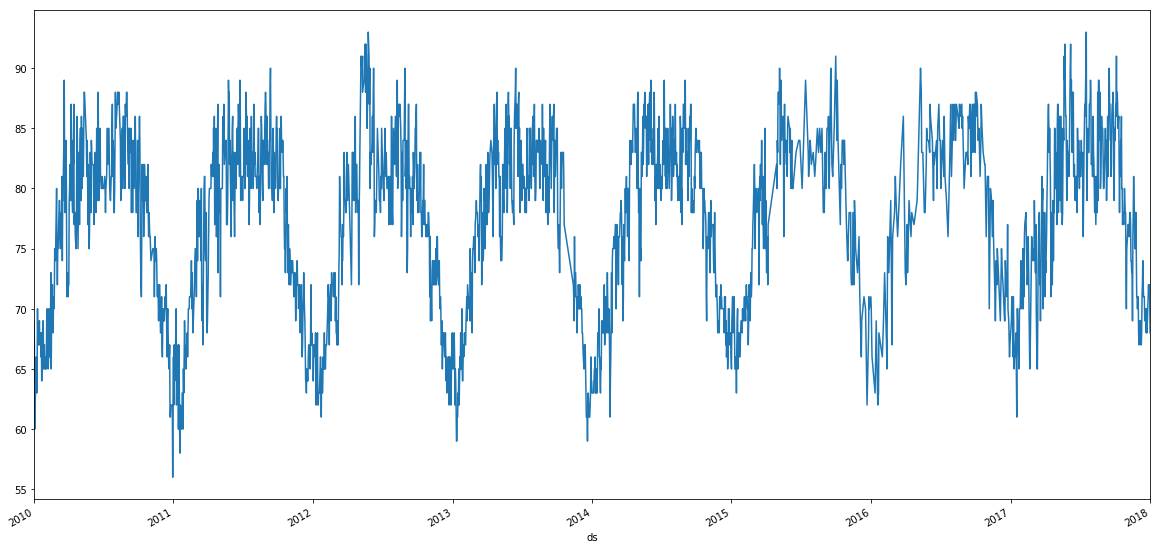

In [53]:
datatest.set_index('ds').y.plot() # here again plotting the data on datestamp

In [54]:
datatest.head()


,ds,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,PRCP,PRCP_ATTRIBUTES,y,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES
0,2010-01-01,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,69,"H,,S",NaN,NaN,50.0,",,S"
1,2010-01-02,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,67,"H,,S",NaN,NaN,NaN,NaN
2,2010-01-03,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,60,"H,,S",81.0,",,S",46.0,",,S"
3,2010-01-04,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,62,"H,,S",81.0,",,S",45.0,",,S"
4,2010-01-06,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,65,"H,,S",NaN,NaN,49.0,",,S"


In [55]:
datatest=datatest.replace(0,np.NaN) #removing NaN values and replacing with 0

In [56]:
datatest=datatest.rename(columns={'DATE':'ds', 'TAVG':'y'})


In [57]:
datatest.head()

,ds,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,PRCP,PRCP_ATTRIBUTES,y,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES
0,2010-01-01,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,69,"H,,S",NaN,NaN,50.0,",,S"
1,2010-01-02,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,67,"H,,S",NaN,NaN,NaN,NaN
2,2010-01-03,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,60,"H,,S",81.0,",,S",46.0,",,S"
3,2010-01-04,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,62,"H,,S",81.0,",,S",45.0,",,S"
4,2010-01-06,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,65,"H,,S",NaN,NaN,49.0,",,S"


In [58]:
#datatest=datatest.head(1500)


In [59]:

model = Prophet(yearly_seasonality=True,weekly_seasonality=True,daily_seasonality=True)
#creating prophet model with yearly, weekly and daily

In [60]:
model.fit(datatest)
#fit model to the dataset

/home/ttw/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [61]:
future = model.make_future_dataframe(periods=1000, freq = 'd')
#making a future data frame with 1000 days in advance of daily frequency
future.tail()

,ds
3335,2020-09-23
3336,2020-09-24
3337,2020-09-25
3338,2020-09-26
3339,2020-09-27


In [62]:
forecast = model.predict(future)
#future predicition

In [63]:
forecast.tail()

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,yhat
3335,2020-09-23,72.400705,71.609149,73.258500,80.110516,88.234564,11.617239,11.617239,11.617239,6.632598,...,0.0,0.0,0.0,-0.056380,-0.056380,-0.056380,5.041021,5.041021,5.041021,84.017944
3336,2020-09-24,72.401063,71.607920,73.260118,79.860199,88.605181,11.733922,11.733922,11.733922,6.632598,...,0.0,0.0,0.0,0.042945,0.042945,0.042945,5.058380,5.058380,5.058380,84.134986
3337,2020-09-25,72.401422,71.606691,73.263251,80.186765,88.267156,11.804119,11.804119,11.804119,6.632598,...,0.0,0.0,0.0,0.090785,0.090785,0.090785,5.080736,5.080736,5.080736,84.205541
3338,2020-09-26,72.401780,71.605448,73.265549,79.953362,88.136198,11.745574,11.745574,11.745574,6.632598,...,0.0,0.0,0.0,0.006411,0.006411,0.006411,5.106565,5.106565,5.106565,84.147353
3339,2020-09-27,72.402138,71.603460,73.267359,80.264629,88.453456,11.902550,11.902550,11.902550,6.632598,...,0.0,0.0,0.0,0.135900,0.135900,0.135900,5.134052,5.134052,5.134052,84.304688


In [64]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)
#displaying with variances of yhat, the predicted values 

,ds,yhat,yhat_lower,yhat_upper
3330,2020-09-18,84.182498,79.794758,88.304099
3331,2020-09-19,84.079188,80.075172,87.964483
3332,2020-09-20,84.197549,80.085374,88.516148
3333,2020-09-21,83.891927,79.703160,88.199643
3334,2020-09-22,84.009634,80.183943,88.418022
3335,2020-09-23,84.017944,80.110516,88.234564
3336,2020-09-24,84.134986,79.860199,88.605181
3337,2020-09-25,84.205541,80.186765,88.267156
3338,2020-09-26,84.147353,79.953362,88.136198
3339,2020-09-27,84.304688,80.264629,88.453456


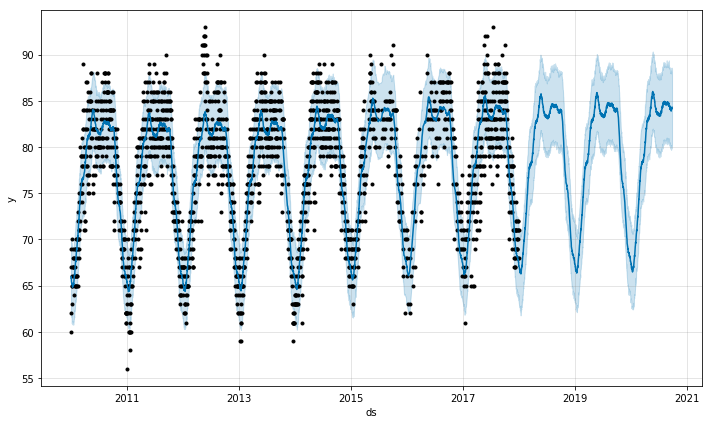

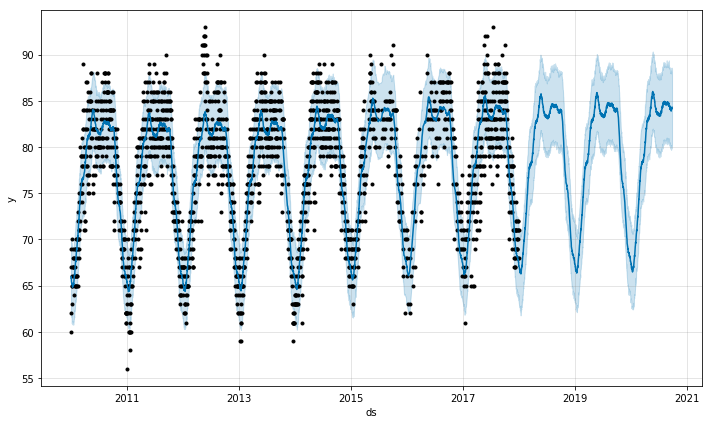

In [65]:
model.plot(forecast)
#visualizing the forecast

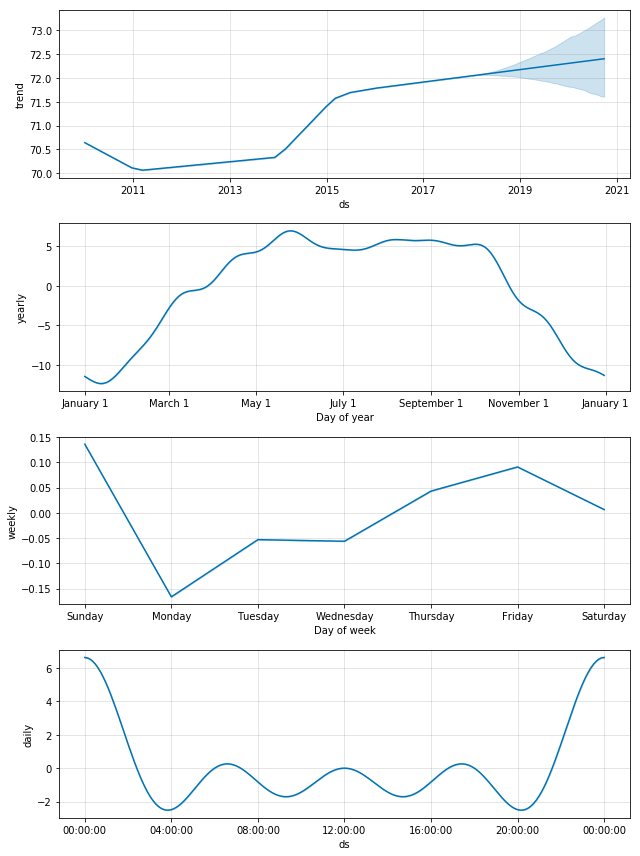

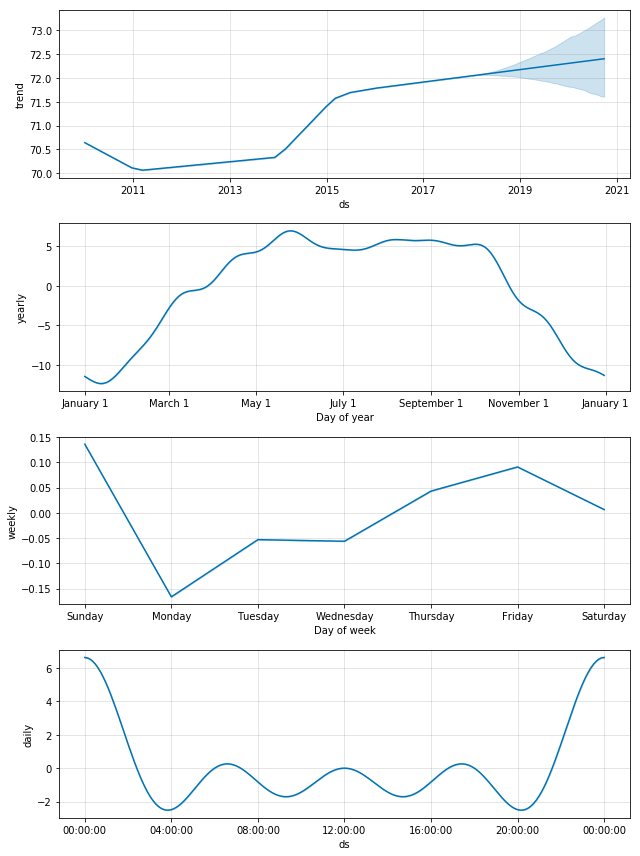

In [66]:
model.plot_components(forecast)
#visualizing the components of the forecast